In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
ob = pd.read_csv(r"C:\Users\wasay\Desktop\python\AI\hmlskl\datasets\lifesat\oecd_bli_2015.csv")
gdp = pd.read_csv(r"C:\Users\wasay\Desktop\python\AI\hmlskl\datasets\lifesat\gdp_per_capita.csv", encoding="latin1", delimiter="\t",on_bad_lines='skip')

In [3]:
def prepre_data(ob, gdp):
    ob = ob[ob['INEQUALITY'] == 'TOT']
    ob = ob.pivot(index='Country', columns='Indicator', values='Value')
    
    gdp.rename(columns={'2015' : 'GDP'}, inplace=True)
    gdp.set_index('Country', inplace=True)
    
    gdp['GDP'] = gdp['GDP'].replace(',' , '', regex=True)
    gdp['GDP'] = pd.to_numeric(gdp['GDP'], errors='coerce')
    
    fs = pd.merge(left=ob, right=gdp, left_index=True,right_index=True)
    return fs[['Life satisfaction','GDP']]

In [4]:
cs = prepre_data(ob, gdp)
x = np.c_[cs['GDP']]
y = np.c_[cs['Life satisfaction']]
print(cs)

                 Life satisfaction         GDP
Country                                       
Australia                      7.3   50961.865
Austria                        6.9   43724.031
Belgium                        6.9   40106.632
Brazil                         7.0    8669.998
Canada                         7.3   43331.961
Chile                          6.7   13340.905
Czech Republic                 6.5   17256.918
Denmark                        7.5   52114.165
Estonia                        5.6   17288.083
Finland                        7.4   41973.988
France                         6.5   37675.006
Germany                        7.0   40996.511
Greece                         4.8   18064.288
Hungary                        4.9   12239.894
Iceland                        7.5   50854.583
Ireland                        7.0   51350.744
Israel                         7.4   35343.336
Italy                          6.0   29866.581
Japan                          5.9   32485.545
Korea        

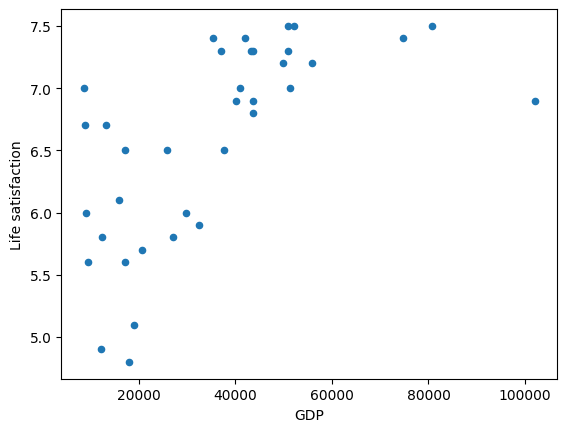

In [5]:
cs.plot(kind='scatter', x='GDP', y='Life satisfaction')
plt.show()

In [6]:
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)
x_new = [[22587]]
print(model.predict(x_new))

[[6.28653637]]
